# Setup

In [1]:
%pylab --no-import-all inline
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


Don't necessarily actually want the figures to be inline (not really necessary here as I really just want to save them)

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
import ParaTemp.CoordinateAnalysis as ca

from ParaTemp import cd
import pandas as pd

import os

import MDAnalysis
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as mdardf
from MDAnalysis.analysis.base import AnalysisBase  
# This didn't seem to work as well as just copying the code into this notebook

In [3]:
configs = {'MaEn': 'major-endo/13-3htmf-etc/05',
           'MaEx': 'major-exo/13-3htmf-etc/05',
           'MiEn': 'minor-endo/13-3htmf-etc/05',
           'MiEx': 'minor-exo/13-3htmf-etc/05'
          }

# Combined open/closed FESs

## Test stuff

In [1]:
import pandas as pd
df = pd.DataFrame()

In [7]:
df['a'] = [1, 2]

In [11]:
ndf = None
np.histogram(ndf['b'])

TypeError: 'NoneType' object has no attribute '__getitem__'

In [14]:
tdf = pd.DataFrame(columns=['O-O', 'O(l)-Cy', 'O(r)-Cy'])

In [21]:
tdf.append(pd.DataFrame([[1,2,3], [2,3,4]], columns=['O-O', 'O(l)-Cy', 'O(r)-Cy']), in_p)

,O-O,O(l)-Cy,O(r)-Cy
0,1,2,3
1,2,3,4


In [22]:
tdf

,O-O,O(l)-Cy,O(r)-Cy


## Production

Now starting on MaEx 0...
Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '754462'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MaEx-out0.h5[754462]
Now starting on MiEn 0...
Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '776242'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MiEn-out0.h5[776242]
Now starting on MiEx 0...


/usr3/graduate/theavey/.local/lib/python2.7/site-packages/MDAnalysis/coordinates/XDR.py:126: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '773192'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MiEx-out0.h5[773192]
Now starting on MaEn 0...
Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '775548'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '750ns'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MaEn-out0.h5[775548]
Now starting on MaEx 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MaEx-out1.h5[754462]
Now starting on MiEn 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEn-out1.h5[776242]
Now starting on MiEx 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEx-out1.h5[773192]
Now starting on MaEn 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MaEn-out1.h5[775548]
Now starting on MaEx 2...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MaEx-out2.h5[754462]
Now starting on MiEn 2...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEn-out2.h5[776242]
Now starting on MiEx 2...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEx-out2.h5[773192]
Now starting on MaEn 2...
Calculating oxygen distances.

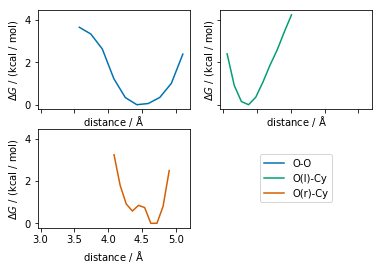

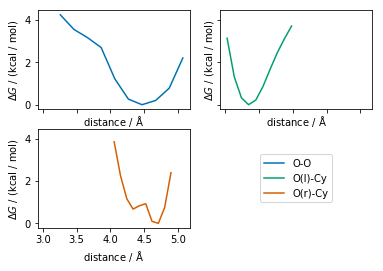

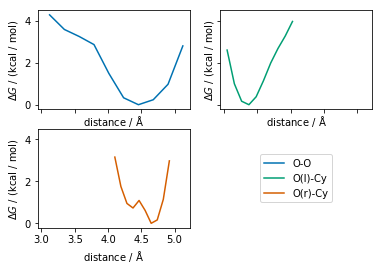

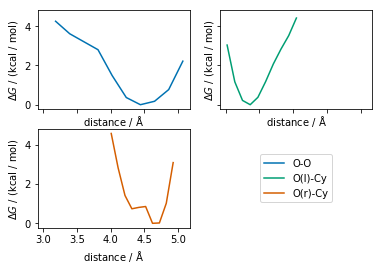

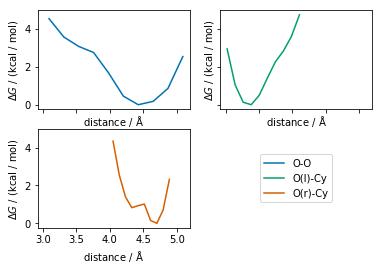

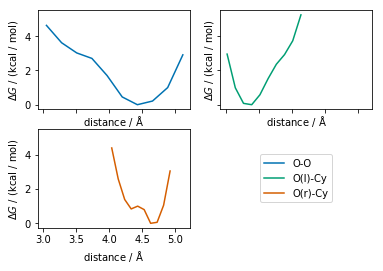

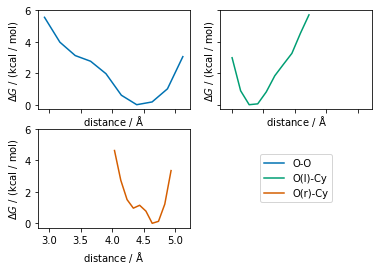

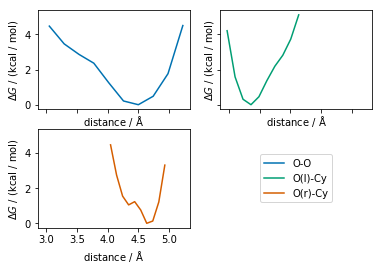

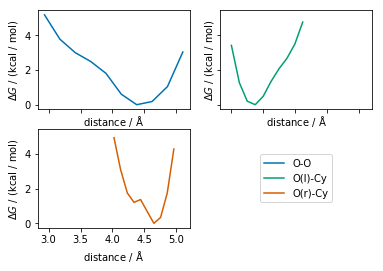

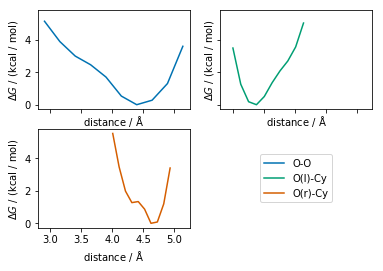

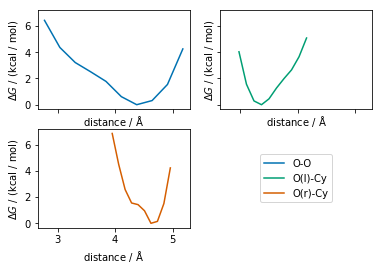

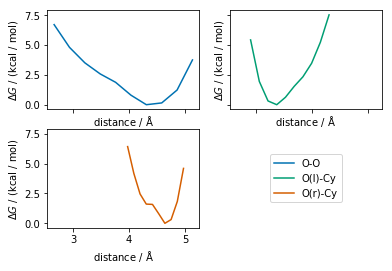

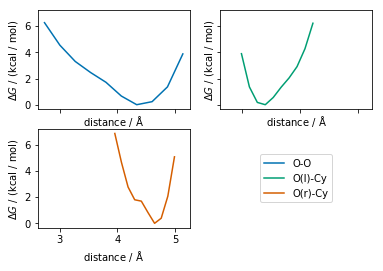

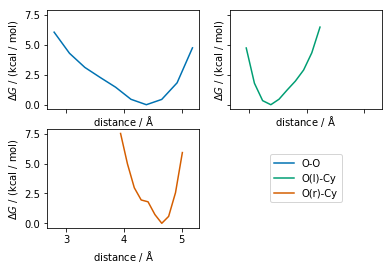

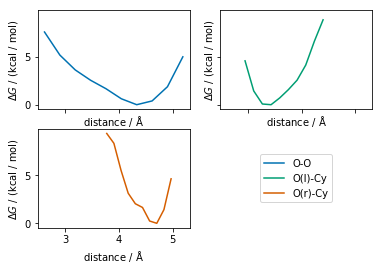

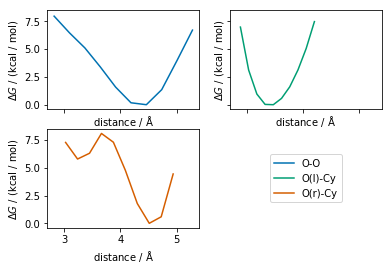

In [23]:
for i in xrange(16):
    comb_df = pd.DataFrame(columns=['O-O', 'O(l)-Cy', 'O(r)-Cy'])
    if os.path.exists('comb-o-data-{}.h5'.format(i)):
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            try:
                comb_df = store['time_750ns']
            except KeyError:
                comb_df = store['750ns']
    else:
        for key in configs:
            with cd(configs[key]):
                with open('TOPO/temperatures.dat', 'r') as t_file:
                    temps = list(t_file.read()[1:-2].split(', '))
                temp = float(temps[i])
                print 'Now starting on {} {}...'.format(key, i)
                univ = ca.Taddol('../../../solutes.gro', 
                                 'npt-PT-{}-out{}.xtc'.format(key, i))
                try:
                    univ.read_data()
                except IOError:
                    save_data = True
                    pass
                else:
                    save_data = False
                comb_df = comb_df.append(univ.ox_dists, ignore_index=True)
                if save_data:
                    univ.save_data()
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            store['time_750ns'] = comb_df
        print('Saved combined data as {}'.format('comb-o-data-{}.h5'.format(i)))
    fig = univ.fes_ox_dists(data=comb_df, temp=temp, linewidth=3)
    for axes in fig.axes[:3]:
        axes.set_ylim[0:8]
    fig.savefig('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i))
    plt.close('all')
    print('Saved figure as {}'.format('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i)))
    print('Done with temp {:.0f} K ({} of 16).'.format(temp, i+1) \
          ' Moving to next temperature...\n\n')

# Create final figures

## Production

In [183]:
overwrite = True

for key in configs:
    with cd(configs[key]):
        with open('TOPO/temperatures.dat', 'r') as t_file:
            temps = list(t_file.read()[1:-2].split(', '))
        univ = ca.Taddol('../../../solutes.gro', 
                         'npt-PT-{}-out{}.xtc'.format(key, '0'))
        final_time = int(univ.data['Time'].iat[-1]/1000)
        if final_time >= 1000:
            final_time = str(final_time/1000)+'us'
        else:
            final_time = str(final_time) + 'ns'
        if os.path.isfile('fes-ox-dists-rjm-PT-{}-comb-{}.pdf'.format(key, final_time)) or not overwrite:
            print('\nAll of {} seems to be complete, moving on to next config...\n\n'.format(key))
            continue
        fig_fes_cvs, axes_fes_cvs = plt.subplots(4, 4, sharex=True, sharey=True)
        fig_fes_cvs_open, axes_fes_cvs_open = plt.subplots(4, 4, sharex=True, sharey=True)
        fig_fes_cvs_closed, axes_fes_cvs_closed = plt.subplots(4, 4, sharex=True, sharey=True)
        fig_fes_ox_dists, axes_fes_ox_dists = plt.subplots(8, 8, sharex=True, sharey=True)
        for i in xrange(16):
            print 'Now starting on {} {}...'.format(key, i)
            temp = float(temps[i])
            univ = ca.Taddol('../../../solutes.gro', 
                             'npt-PT-{}-out{}.xtc'.format(key, i))
            final_time = str(int(univ.data['Time'].iat[-1]/1000))+'ns'
            file_name_end = '-rjm-PT-{}-{}-{}.pdf'.format(key, i, final_time)
#             if os.path.isfile('fes-ox-dists'+file_name_end):
#                 print('{} {} seems to already '.format(key, i) +
#                       'be complete; moving on...')
#                 continue
            try:
                univ.read_data()
            except IOError:
                univ.calculate_distances()
                univ.save_data()
            univ.calc_open_closed()  # This is fast, so doesn't really matter if repeated
            print 'Done importing and calculating, making figures...'
            
            ax = axes_fes_cvs.flat[i]
            univ.fes_2d_cvs(temp=temp, display=False, ax=ax)
            filename = 'fes-cvs'+file_name_end
            if (not os.path.isfile(filename)) or overwrite:
                fig = univ.fes_2d_cvs(temp=temp)
                fig.savefig(filename)
            
            if len(univ.data[univ.data['open_TAD']]['CV1']) > 1:
                ax = axes_fes_cvs_open.flat[i]
                univ.fes_2d_cvs(univ.data[univ.data['open_TAD']]['CV1'], 
                                univ.data[univ.data['open_TAD']]['CV2'],
                                temp=temp, display=False, ax=ax)
                filename = 'fes-cvs-open'+file_name_end
                if (not os.path.isfile(filename)) or overwrite:
                    fig = univ.fes_2d_cvs(univ.data[univ.data['open_TAD']]['CV1'], 
                                          univ.data[univ.data['open_TAD']]['CV2'],
                                          temp=temp)
                    fig.savefig(filename)
            else:
                print '\n\n!!!! Not enough data to plot for open ' \
                      '{} {} !!!!\n\n'.format(key, i)
            
            if len(univ.data[univ.data['closed_TAD']]['CV1']) > 1:
                ax = axes_fes_cvs_closed.flat[i]
                univ.fes_2d_cvs(univ.data[univ.data['closed_TAD']]['CV1'], 
                                univ.data[univ.data['closed_TAD']]['CV2'],
                                temp=temp, display=False, ax=ax)
                filename = 'fes-cvs-closed'+file_name_end
                if (not os.path.isfile(filename)) or overwrite:
                    fig = univ.fes_2d_cvs(univ.data[univ.data['closed_TAD']]['CV1'], 
                                          univ.data[univ.data['closed_TAD']]['CV2'],
                                          temp=temp)
                    fig.savefig(filename)
            else:
                print '\n\n!!!! Not enough data to plot for closed ' \
                      '{} {} !!!!\n\n'.format(key, i)
            
            axes = axes_fes_ox_dists.flat[4*i:4*i+4]
            univ.fes_ox_dists(temp=temp, save=False, display=False, linewidth=3,
                              axes=axes)
            filename = 'fes-ox-dists'+file_name_end
            if (not os.path.isfile(filename)) or overwrite:
                fig = univ.fes_ox_dists(temp=temp, save=False, display=True, 
                                        linewidth=3)
                fig.savefig(filename)
            print('Done making and saving figures for '
                  '{} {}, closing and moving on...'.format(key, i))
            #plt.close('all')  # Not necessary because they pass out of scope?
        for axes in axes_fes_cvs[0:3]:
            for ax in axes:
                ax.set_xlabel('')
        for axes in axes_fes_cvs[:,1:]:
            for ax in axes:
                ax.set_ylabel('')
        fig_fes_cvs.tight_layout()
#         fig_fes_cvs.savefig('fes-cvs-rjm-PT-{}-comb-{}.pdf'.format(key, final_time))
        for axes in axes_fes_cvs_open[0:3]:
            for ax in axes:
                ax.set_xlabel('')
        for axes in axes_fes_cvs_open[:,1:]:
            for ax in axes:
                ax.set_ylabel('')
        fig_fes_cvs_open.tight_layout()
#         fig_fes_cvs_open.savefig('fes-cvs-open-rjm-PT-{}-comb-{}.pdf'.format(key, final_time))
        for axes in axes_fes_cvs_closed[0:3]:
            for ax in axes:
                ax.set_xlabel('')
        for axes in axes_fes_cvs_closed[:,1:]:
            for ax in axes:
                ax.set_ylabel('')
        fig_fes_cvs_closed.tight_layout()
#         fig_fes_cvs_closed.savefig('fes-cvs-closed-rjm-PT-{}-comb-{}.pdf'.format(key, final_time))
#         fig_fes_ox_dists.savefig('fes-ox-dists-rjm-PT-{}-comb-{}.pdf'.format(key, final_time))
        print '\n\n---Done with all {}, moving to next config'.format(key)
        plt.close('all')

Now starting on MaEx 0...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 0, closing and moving on...
Now starting on MaEx 1...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 1, closing and moving on...
Now starting on MaEx 2...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 2, closing and moving on...
Now starting on MaEx 3...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 3, closing and moving on...
Now starting on MaEx 4...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists

Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 5, closing and moving on...
Now starting on MiEx 6...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 6, closing and moving on...
Now starting on MiEx 7...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 7, closing and moving on...
Now starting on MiEx 8...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 8, closing and moving on...
Now starting on MiEx 9...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving f

## Combined Ox FESs Production

In [23]:
for i in xrange(16):
    comb_df = pd.DataFrame(columns=['O-O', 'O(l)-Cy', 'O(r)-Cy'])
    if os.path.exists('comb-o-data-{}.h5'.format(i)):
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            comb_df = store['time_1us']
    else:
        for key in configs:
            with cd(configs[key]):
                with open('TOPO/temperatures.dat', 'r') as t_file:
                    temps = list(t_file.read()[1:-2].split(', '))
                temp = float(temps[i])
                print 'Now starting on {} {}...'.format(key, i)
                univ = ca.Taddol('../../../solutes.gro', 
                                 'npt-PT-{}-out{}.xtc'.format(key, i))
                try:
                    univ.read_data()
                except IOError:
                    save_data = True
                    pass
                else:
                    save_data = False
                comb_df = comb_df.append(univ.ox_dists, ignore_index=True)
                if save_data:
                    univ.save_data()
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            store['time_1us'] = comb_df
        print('Saved combined data as {}'.format('comb-o-data-{}.h5'.format(i)))
    fig = univ.fes_ox_dists(data=comb_df, temp=temp, linewidth=3)
    for axes in fig.axes[:3]:
        axes.set_ylim([0,8])
    fig.savefig('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i))
    plt.close('all')
    print('Saved figure as {}'.format('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i)))
    print('Done with temp {:.0f} K ({} of 16).'.format(temp, i+1) +
          ' Moving to next temperature...\n\n')

Saved figure as fes-ox-dists-rjm-PT-comb-0.pdf
Done with temp 205 K (1 of 16). Moving to next temperature...


Now starting on MaEx 1...
Now starting on MiEn 1...
Now starting on MiEx 1...
Now starting on MaEn 1...
Saved combined data as comb-o-data-1.h5
Saved figure as fes-ox-dists-rjm-PT-comb-1.pdf
Done with temp 216 K (2 of 16). Moving to next temperature...


Now starting on MaEx 2...
Now starting on MiEn 2...
Now starting on MiEx 2...
Now starting on MaEn 2...
Saved combined data as comb-o-data-2.h5
Saved figure as fes-ox-dists-rjm-PT-comb-2.pdf
Done with temp 227 K (3 of 16). Moving to next temperature...


Now starting on MaEx 3...
Now starting on MiEn 3...
Now starting on MiEx 3...
Now starting on MaEn 3...
Saved combined data as comb-o-data-3.h5
Saved figure as fes-ox-dists-rjm-PT-comb-3.pdf
Done with temp 238 K (4 of 16). Moving to next temperature...


Now starting on MaEx 4...
Now starting on MiEn 4...
Now starting on MiEx 4...
Now starting on MaEn 4...
Saved combined data 

# CV Cut Plots

## Production

In [139]:
r = 0.0019872  # kcal_th/(K mol)

for key in configs:
    with cd(configs[key]):
        i = 0
        print 'Now starting on {} {}...'.format(key, i)
        univ = ca.Taddol('../../../solutes.gro', 
                         'npt-PT-{}-out{}.xtc'.format(key, i))
        temp = 205
        final_time = int(univ.data['Time'].iat[-1]/1000)
        if final_time > 1000:
            final_time = str(final_time/1000)+'us'
        else:
            final_time = str(final_time) + 'ns'
        file_name_end = '-rjm-PT-{}-{}-{}.pdf'.format(key, i, final_time)
        try:
            univ.read_data()
        except IOError:
            univ.calculate_distances()
            univ.calc_open_closed()
            univ.save_data()
        univ.calc_open_closed()

        x = univ.data.loc[lambda x: (2.5 < x.CV2) & (x.CV2 < 3.5) & x.closed_TAD]['CV1']
        if len(x) > 2:
            n, bins = np.histogram(x, bins=20)
            n = [float(j) for j in n]
            prob = np.array([j / max(n) for j in n]) + 1e-40
            delta_g = np.array([-r * temp * np.log(p) for p in prob])
            delta_g
            fig, ax = plt.subplots()
            line, = ax.plot(bins[:-1], delta_g)
            ax.set_ylabel(r'$\Delta G$ / (kcal / mol)')
            ax.set_xlabel(r'CV 1 / $\mathrm{\AA}$')
            fig.tight_layout()
            fig.savefig('fes-CV1-closed-shortCV2'+file_name_end)
        else:
            print('Not enough closed frames for {} {}'.format(key, i))
            
        x = univ.data.loc[lambda x: (7.5 < x.CV2) & (x.CV2 < 8.5) & x.open_TAD]['CV1']
        if len(x) > 2:
            n, bins = np.histogram(x, bins=20)
            n = [float(j) for j in n]
            prob = np.array([j / max(n) for j in n]) + 1e-40
            delta_g = np.array([-r * temp * np.log(p) for p in prob])
            delta_g
            fig, ax = plt.subplots()
            line, = ax.plot(bins[:-1], delta_g)
            ax.set_ylabel(r'$\Delta G$ / (kcal / mol)')
            ax.set_xlabel(r'CV 1 / $\mathrm{\AA}$')
            fig.tight_layout()
            fig.savefig('fes-CV1-open-longCV2'+file_name_end)
        else:
            print('Not enough open frames for {} {}'.format(key, i))

Now starting on MaEx 0...
Not enough closed frames for MaEx 0
Now starting on MiEn 0...
Not enough closed frames for MiEn 0
Now starting on MiEx 0...
Not enough closed frames for MiEx 0
Now starting on MaEn 0...
Not enough closed frames for MaEn 0


# Select geoms from minima

## Production

In [25]:
cv1_cuts = [6.5, 9.]
cv2_cuts = [1.5, 3.]
name_set = 'lCV1-sCV2'

univ = ca.Taddol('solutes.gro', 'major-endo/13-3htmf-etc/05/pbc-MaEn-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-endo/13-3htmf-etc/05/npt-PT-MaEn-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEn-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)

These cutoffs include 85723 frames.


In [23]:
cv1_cuts = [1.5, 4.]
cv2_cuts = [6.75, 8.5]
name_set = 'sCV1-lCV2'

univ = ca.Taddol('solutes.gro', 'major-endo/13-3htmf-etc/05/pbc-MaEn-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-endo/13-3htmf-etc/05/npt-PT-MaEn-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEn-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)

These cutoffs include 65794 frames.


In [27]:
cv1_cuts = [1.5, 4.]
cv2_cuts = [6.75, 8.5]
name_set = 'sCV1-lCV2'

univ = ca.Taddol('solutes.gro', 'major-exo/13-3htmf-etc/05/pbc-MaEx-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-exo/13-3htmf-etc/05/npt-PT-MaEx-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEx-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)

These cutoffs include 54987 frames.


In [28]:
cv1_cuts = [6.5, 9.]
cv2_cuts = [1.5, 3.]
name_set = 'lCV1-sCV2'

univ = ca.Taddol('solutes.gro', 'major-exo/13-3htmf-etc/05/pbc-MaEx-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-exo/13-3htmf-etc/05/npt-PT-MaEx-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEx-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)
            

These cutoffs include 133980 frames.


# g(R)

In [4]:
univ = ca.Taddol('solutes.gro', 'major-endo/13-3htmf-etc/05/pbc-MaEn-0.xtc')

reactants = univ.select_atoms('resname is 3HT or resname in CIN')
catalyst = univ.select_atoms('resname in TAD')

## g(R) class

### AnalysisBase

In [28]:
# Copied from MDAnalysis

from __future__ import absolute_import
import six
from six.moves import range, zip
import inspect
import logging

import numpy as np
from MDAnalysis import coordinates
from MDAnalysis.core import AtomGroup
from MDAnalysis.lib.log import ProgressMeter#, _set_verbose

logger = logging.getLogger(__name__)


class AnalysisBase(object):
    """Base class for defining multi frame analysis
    The class it is designed as a template for creating multiframe analyses.
    This class will automatically take care of setting up the trajectory
    reader for iterating, and it offers to show a progress meter.
    To define a new Analysis, `AnalysisBase` needs to be subclassed
    `_single_frame` must be defined. It is also possible to define
    `_prepare` and `_conclude` for pre and post processing. See the example
    below.
    .. code-block:: python
       class NewAnalysis(AnalysisBase):
           def __init__(self, atomgroup, parameter, **kwargs):
               super(NewAnalysis, self).__init__(atomgroup.universe.trajectory,
                                                 **kwargs)
               self._parameter = parameter
               self._ag = atomgroup
           def _prepare(self):
               # OPTIONAL
               # Called before iteration on the trajectory has begun.
               # Data structures can be set up at this time
               self.result = []
           def _single_frame(self):
               # REQUIRED
               # Called after the trajectory is moved onto each new frame.
               # store result of `some_function` for a single frame
               self.result.append(some_function(self._ag, self._parameter))
           def _conclude(self):
               # OPTIONAL
               # Called once iteration on the trajectory is finished.
               # Apply normalisation and averaging to results here.
               self.result = np.asarray(self.result) / np.sum(self.result)
    Afterwards the new analysis can be run like this.
    .. code-block:: python
       na = NewAnalysis(u.select_atoms('name CA'), 35).run()
       print(na.result)
    """

    def __init__(self, trajectory, start=None,
                 stop=None, step=None, verbose=None, quiet=None):
        """
        Parameters
        ----------
        trajectory : mda.Reader
            A trajectory Reader
        start : int, optional
            start frame of analysis
        stop : int, optional
            stop frame of analysis
        step : int, optional
            number of frames to skip between each analysed frame
        verbose : bool, optional
            Turn on verbosity
        """
#         self._verbose = _set_verbose(verbose, quiet, default=False)
#         self._quiet = not self._verbose
        self._setup_frames(trajectory, start, stop, step)

    def _setup_frames(self, trajectory, start=None, stop=None, step=None):
        """
        Pass a Reader object and define the desired iteration pattern
        through the trajectory
        Parameters
        ----------
        trajectory : mda.Reader
            A trajectory Reader
        start : int, optional
            start frame of analysis
        stop : int, optional
            stop frame of analysis
        step : int, optional
            number of frames to skip between each analysed frame
        """
        self._trajectory = trajectory
        start, stop, step = trajectory.check_slice_indices(start, stop, step)
        self.start = start
        self.stop = stop
        self.step = step
        self.n_frames = len(range(start, stop, step))
        interval = int(self.n_frames // 100)
        if interval == 0:
            interval = 1

        # ensure _verbose is set when __init__ wasn't called, this is to not
        # break pre 0.16.0 API usage of AnalysisBase
        if not hasattr(self, '_verbose'):
            if hasattr(self, '_quiet'):
                # Here, we are in the odd case where a children class defined
                # self._quiet without going through AnalysisBase.__init__.
                warnings.warn("The *_quiet* attribute of analyses is "
                              "deprecated (from 0.16)use *_verbose* instead.",
                              DeprecationWarning)
                self._verbose = not self._quiet
            else:
                self._verbose = True
                self._quiet = not self._verbose
        self._pm = ProgressMeter(self.n_frames if self.n_frames else 1,
                                 interval=interval#, verbose=self._verbose
                                )

    def _single_frame(self):
        """Calculate data from a single frame of trajectory
        Don't worry about normalising, just deal with a single frame.
        """
        raise NotImplementedError("Only implemented in child classes")

    def _prepare(self):
        """Set things up before the analysis loop begins"""
        pass

    def _conclude(self):
        """Finalise the results you've gathered.
        Called at the end of the run() method to finish everything up.
        """
        pass

    def run(self):
        """Perform the calculation"""
        logger.info("Starting preparation")
        self._prepare()
        for i, ts in enumerate(
                self._trajectory[self.start:self.stop:self.step]):
            self._frame_index = i
            self._ts = ts
            # logger.info("--> Doing frame {} of {}".format(i+1, self.n_frames))
            self._single_frame()
            self._pm.echo(self._frame_index)
        logger.info("Finishing up")
        self._conclude()
        return self

### singleRDF

In [33]:
# Adadpted from InterRDF from MDAnalysis code

from __future__ import division, absolute_import


from MDAnalysis.lib.util import blocks_of
from MDAnalysis.lib import distances
# from MDAnalysis.analysis.base import AnalysisBase

class singleRDF(AnalysisBase):
    
    def __init__(self, g1, g2, nbins=75, range=(0.0, 15.0), exclusion_block=None, **kwargs):
        super(singleRDF, self).__init__(g1.universe.trajectory, **kwargs)
#         super(InterRDF, self).__init__()
#         AnalysisBase.__init__(g1.universe.trajectory, **kwargs)
        self.g1 = g1
        self.g2 = g2
        self.u = g1.universe
#         self._trajectory = self.u.trajectory

        self.rdf_settings = {'bins': nbins,
                             'range': range}
        self._exclusion_block = exclusion_block

    def _prepare(self):
        # Empty histogram to store the RDF
        count, edges = np.histogram([-1], **self.rdf_settings)
        count = count.astype(np.float64)
        count *= 0.0
        self.count = count
        self.edges = edges
        self.bins = 0.5 * (edges[:-1] + edges[1:])

        # Need to know average volume
        self.volume = 0.0

        # Allocate a results array which we will reuse
        self._result = np.zeros((1,), dtype=np.float64)
        # If provided exclusions, create a mask of _result which
        # lets us take these out
        if self._exclusion_block is not None:
            self._exclusion_mask = blocks_of(self._result,
                                             *self._exclusion_block)
            self._maxrange = self.rdf_settings['range'][1] + 1.0
        else:
            self._exclusion_mask = None

    def _single_frame(self):
        mda.lib.distances.calc_bonds(np.array([self.g1.center_of_mass()], dtype='float32'),
                                     np.array([self.g2.center_of_mass()], dtype='float32'),
                                     box=self.u.dimensions, result=self._result)
        # Maybe exclude same molecule distances
        if self._exclusion_mask is not None:
            self._exclusion_mask[:] = self._maxrange

        count = np.histogram(self._result, **self.rdf_settings)[0]
        self.count += count

        self.volume += self._ts.volume

    def _conclude(self):
        # Number of each selection
        nA = 1
        nB = 1
        N = nA * nB

        # If we had exclusions, take these into account
        if self._exclusion_block:
            xA, xB = self._exclusion_block
            nblocks = nA / xA
            N -= xA * xB * nblocks

        # Volume in each radial shell
        vol = np.power(self.edges[1:], 3) - np.power(self.edges[:-1], 3)
        vol *= 4/3.0 * np.pi

        # Average number density
        box_vol = self.volume / self.n_frames
        density = N / box_vol

        rdf = self.count / (density * vol * self.n_frames)

        self.rdf = rdf

### Original InterRDF

In [18]:
# Copied from MDAnalysis

class InterRDF(AnalysisBase):
    """Intermolecular pair distribution function
    InterRDF(g1, g2, nbins=75, range=(0.0, 15.0))
    Arguments
    ---------
    g1 : AtomGroup
      First AtomGroup
    g2 : AtomGroup
      Second AtomGroup
    nbins : int (optional)
          Number of bins in the histogram [75]
    range : tuple or list (optional)
          The size of the RDF [0.0, 15.0]
    exclusion_block : tuple (optional)
          A tuple representing the tile to exclude from the distance
          array. [None]
    start : int (optional)
          The frame to start at (default is first)
    stop : int (optional)
          The frame to end at (default is last)
    step : int (optional)
          The step size through the trajectory in frames (default is
          every frame)
    Example
    -------
    First create the :class:`InterRDF` object, by supplying two
    AtomGroups then use the :meth:`run` method ::
      rdf = InterRDF(ag1, ag2)
      rdf.run()
    Results are available through the :attr:`bins` and :attr:`rdf`
    attributes::
      plt.plot(rdf.bins, rdf.rdf)
    The `exclusion_block` keyword allows the masking of pairs from
    within the same molecule.  For example, if there are 7 of each
    atom in each molecule, the exclusion mask `(7, 7)` can be used.
    .. versionadded:: 0.13.0
    """
    def __init__(self, g1, g2,
                 nbins=75, range=(0.0, 15.0), exclusion_block=None,
                 **kwargs):
        super(InterRDF, self).__init__(g1.universe.trajectory, **kwargs)
        self.g1 = g1
        self.g2 = g2
        self.u = g1.universe

        self.rdf_settings = {'bins': nbins,
                             'range': range}
        self._exclusion_block = exclusion_block

    def _prepare(self):
        # Empty histogram to store the RDF
        count, edges = np.histogram([-1], **self.rdf_settings)
        count = count.astype(np.float64)
        count *= 0.0
        self.count = count
        self.edges = edges
        self.bins = 0.5 * (edges[:-1] + edges[1:])

        # Need to know average volume
        self.volume = 0.0

        # Allocate a results array which we will reuse
        self._result = np.zeros((len(self.g1), len(self.g2)), dtype=np.float64)
        # If provided exclusions, create a mask of _result which
        # lets us take these out
        if self._exclusion_block is not None:
            self._exclusion_mask = blocks_of(self._result,
                                             *self._exclusion_block)
            self._maxrange = self.rdf_settings['range'][1] + 1.0
        else:
            self._exclusion_mask = None

    def _single_frame(self):
        distances.distance_array(self.g1.positions, self.g2.positions,
                                 box=self.u.dimensions, result=self._result)
        # Maybe exclude same molecule distances
        if self._exclusion_mask is not None:
            self._exclusion_mask[:] = self._maxrange

        count = np.histogram(self._result, **self.rdf_settings)[0]
        self.count += count

        self.volume += self._ts.volume

    def _conclude(self):
        # Number of each selection
        nA = len(self.g1)
        nB = len(self.g2)
        N = nA * nB

        # If we had exclusions, take these into account
        if self._exclusion_block:
            xA, xB = self._exclusion_block
            nblocks = nA / xA
            N -= xA * xB * nblocks

        # Volume in each radial shell
        vol = np.power(self.edges[1:], 3) - np.power(self.edges[:-1], 3)
        vol *= 4/3.0 * np.pi

        # Average number density
        box_vol = self.volume / self.n_frames
        density = N / box_vol

        rdf = self.count / (density * vol * self.n_frames)

        self.rdf = rdf

## Production

### Intermolecular O-O $g(R)$

Now starting on MaEx 0...
Now starting on MiEn 0...
Now starting on MiEx 0...
Now starting on MaEn 0...


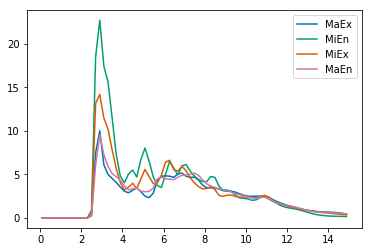

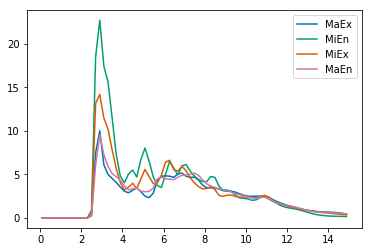

In [51]:
fig, ax = plt.subplots()

bins_all_Os = {}
rdfs_all_Os = {}

for key in sorted(configs):
    with cd(configs[key]):
        i = 0
        print 'Now starting on {} {}...'.format(key, i)
        univ = ca.Taddol('../../../solutes.gro', 
                         'npt-PT-{}-out{}.xtc'.format(key, i))
        temp = 205
        final_time = int(univ.data['Time'].iat[-1]/1000)
        if final_time > 1000:
            final_time = str(final_time/1000)+'us'
        else:
            final_time = str(final_time) + 'ns'
        file_name_end = '-rjm-PT-{}-{}-{}.pdf'.format(key, i, final_time)
        
        reactant_Os = univ.select_atoms('resname is 3HT or resname in CIN and name is O*')
        catalyst_Os = univ.select_atoms('resname in TAD and name is O*')
        
        rcrdf = mdardf.InterRDF(reactant_Os, catalyst_Os)
        rcrdf.run()
        
        bins_all_Os[key] = rcrdf.bins
        rdfs_all_Os[key] = rcrdf.rdf
        
        ax.plot(rcrdf.bins, rcrdf.rdf, label=key)

ax.legend()
fig

In [52]:
fig.savefig('g-of-r-Os-rjm-PT-comb-0.pdf')

### CV oxygen $g(R)$

Now starting on MaEn 0...
Now starting on MaEx 0...
Now starting on MiEn 0...
Now starting on MiEx 0...


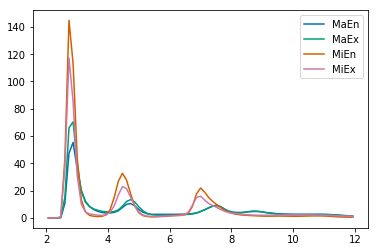

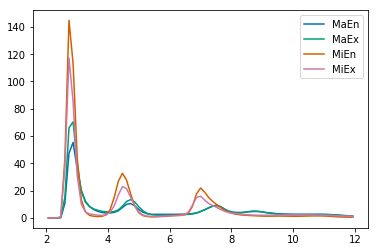

In [111]:
name_gro = 'solutes.gro'

name_gro = os.path.abspath(name_gro)

fig, ax = plt.subplots()

bins_CV_Os = {}
rdfs_CV_Os = {}

for key in sorted(configs):
    with cd(configs[key]):
        i = 0
        print 'Now starting on {} {}...'.format(key, i)
        name_xtc = 'npt-PT-{}-out{}.xtc'.format(key, i)
        univ = ca.Taddol(name_gro, name_xtc)
        temp = 205
        final_time = int(univ.data['Time'].iat[-1]/1000)
        if final_time > 1000:
            final_time = str(final_time/1000)+'us'
        else:
            final_time = str(final_time) + 'ns'
        file_name_end = '-rjm-PT-{}-{}-{}.pdf'.format(key, i, final_time)
        
        reactant_CV_Os = univ.select_atoms('(resname is 3HT) and (name is O or name is OH)')
        catalyst_CV_Os = univ.select_atoms('resname in TAD and (name is OH or name is O1)')
        
        rcrdf = mdardf.InterRDF(reactant_CV_Os, catalyst_CV_Os, range=(2.0, 12.0))
        rcrdf.run()
        
        bins_CV_Os[key] = rcrdf.bins
        rdfs_CV_Os[key] = rcrdf.rdf
        
        ax.plot(rcrdf.bins, rcrdf.rdf, label=key)

ax.legend()
fig

In [57]:
fig.savefig('g-of-r-CV-Os-rjm-PT-comb-0.pdf')

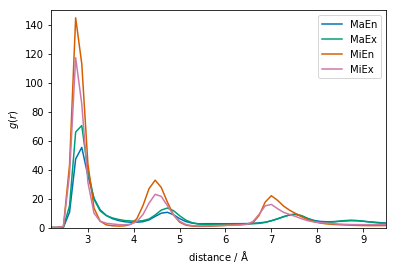

In [113]:
fig, ax = plt.subplots()
for key in sorted(rdfs_CV_Os):
    bins = bins_CV_Os[key]
    rdfs = rdfs_CV_Os[key]

    ax.plot(bins, rdfs, label=key)

ax.legend()
ax.set_ylabel(r'$g(r)$')
ax.set_xlabel('distance / $\mathrm{\AA}$')
ax.set_xlim([2.2,9.5])
ax.set_ylim([-0.2,150])
fig.savefig('g-of-r-CV-Os-rjm-PT-comb-0.pdf')

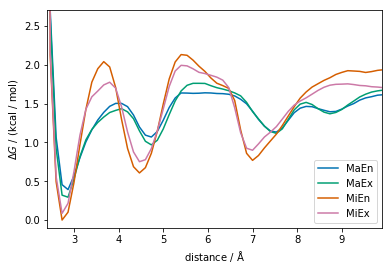

In [116]:
r = 0.0019872
temp = 205

g_CV_Os = {}
for key in rdfs_CV_Os:
    rdfs = rdfs_CV_Os[key]
    g_CV_Os[key] = - r * temp * np.log(rdfs + 1e-40)
min_g = min([min(gs) for gs in g_CV_Os.values()])
for key in g_CV_Os:
    g_CV_Os[key] = g_CV_Os[key] - min_g

fig, ax = plt.subplots()

for key in sorted(g_CV_Os):
    ax.plot(bins_CV_Os[key], g_CV_Os[key], label=key)
    ax.set_xlim([2.4,9.9])
    ax.set_ylim([-0.1,2.7])
ax.legend()
ax.set_ylabel(r'$\Delta G$ / (kcal / mol)')
ax.set_xlabel('distance / $\mathrm{\AA}$')

In [117]:
fig.savefig('fes-g-of-r-CV-Os-rjm-PT-comb-0.pdf')